In [20]:
import numpy as np
import wave

mix_1_wave = wave.open('ICA mix 1.wav', 'r')
mix_1_wave.getparams()

_wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=264515, comptype='NONE', compname='not compressed')

So here we have 44100frmaes/sec and total frames = 264515. Calculate its length in seconds

In [21]:
264515/44100


5.998072562358277

In [22]:
# extract frames of wave file which will be the part of dataset
signal_1_raw = mix_1_wave.readframes(-1)
signal_1 = np.fromstring(signal_1_raw, 'Int16')
print('length: ', len(signal_1))
signal_1[:100]

length:  264515


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  This is separate from the ipykernel package so we can avoid doing imports until


array([  879,  1268,  1460,  1756,  1943,  2216,  2407,  2668,  2866,
        3106,  3308,  3546,  3752,  3981,  4175,  4395,  4588,  4790,
        4966,  5146,  5292,  5436,  5550,  5643,  5717,  5759,  5790,
        5798,  5789,  5756,  5713,  5649,  5576,  5478,  5381,  5267,
        5146,  4999,  4856,  4682,  4502,  4308,  4097,  3875,  3637,
        3380,  3107,  2825,  2514,  2194,  1847,  1472,  1087,   671,
         227,  -219,  -691, -1176, -1666, -2167, -2669, -3179, -3668,
       -4170, -4643, -5116, -5559, -5985, -6380, -6765, -7105, -7422,
       -7706, -7955, -8163, -8339, -8470, -8557, -8600, -8618, -8585,
       -8524, -8425, -8298, -8129, -7947, -7720, -7475, -7205, -6916,
       -6606, -6266, -5922, -5556, -5165, -4774, -4353, -3922, -3476,
       -3021], dtype=int16)

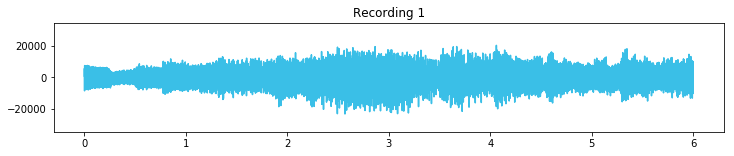

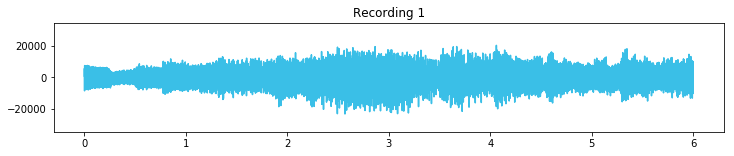

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  del sys.path[0]


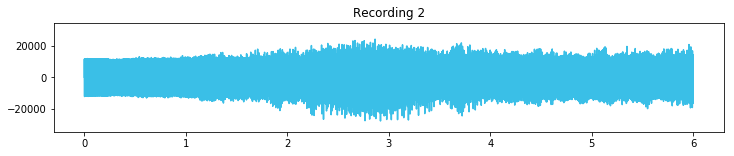

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


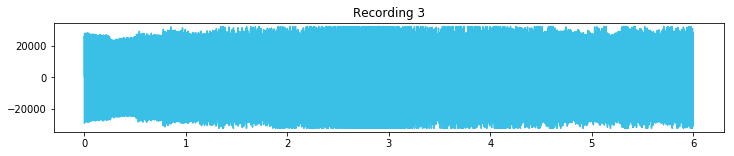

In [25]:
import matplotlib.pyplot as plt
fs = mix_1_wave.getframerate()
timings = np.linspace(0, len(signal_1)/fs, num=len(signal_1))

plt.figure(figsize=(12,2))
plt.title('Recording 1')
plt.plot(timings, signal_1, c='#3ABFE7')
plt.ylim(-35000, 35000)
plt.show()
mix_2_wave = wave.open('ICA mix 2.wav', 'r')

signal_2_raw = mix_2_wave.readframes(-1)
signal_2 = np.fromstring(signal_2_raw, 'Int16')

fs = mix_2_wave.getframerate()
timings = np.linspace(0, len(signal_2)/fs, num=len(signal_2))

plt.figure(figsize=(12,2))
plt.title('Recording 2')
plt.plot(timings, signal_2, c='#3ABFE7')
plt.ylim(-35000, 35000)
plt.show()

mix_3_wave = wave.open('ICA mix 3.wav', 'r')

signal_3_raw = mix_3_wave.readframes(-1)
signal_3 = np.fromstring(signal_3_raw, 'Int16')

fs = mix_3_wave.getframerate()
timings = np.linspace(0, len(signal_3)/fs, num=len(signal_3))

plt.figure(figsize=(12,2))
plt.title('Recording 3')
plt.plot(timings, signal_3, c='#3ABFE7')
plt.ylim(-35000, 35000)
plt.show()

In [27]:
# Cretae a list of signals and run ICA
X=list(zip(signal_1, signal_2, signal_3))

from sklearn.decomposition import FastICA
ica=FastICA(n_components=3)
ica_result = ica.fit_transform(X)

ica_result.shape

(264515, 3)

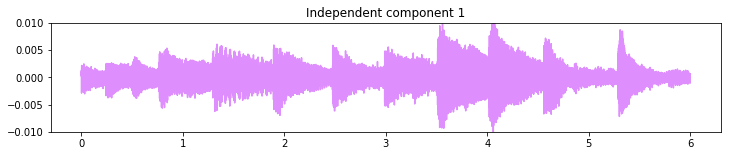

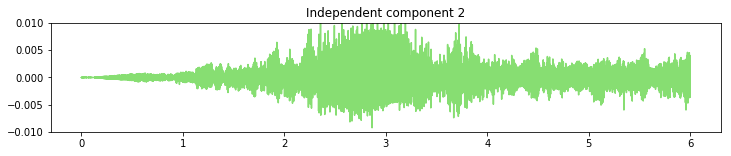

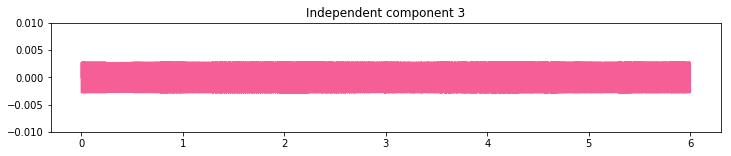

In [30]:
result_signal_1 = ica_result[:,0]
result_signal_2 = ica_result[:,1]
result_signal_3 = ica_result[:,2]

fs = mix_1_wave.getframerate()
timings = np.linspace(0, len(result_signal_1)/fs, num=len(result_signal_1))

plt.figure(figsize=(12,2))
plt.title('Independent component 1')
plt.plot(timings, result_signal_1, c='#df8efd')
plt.ylim(-0.010, 0.010)
plt.show()

plt.figure(figsize=(12,2))
plt.title('Independent component 2')
plt.plot(timings, result_signal_2, c='#87de72')
plt.ylim(-0.010, 0.010)
plt.show()

plt.figure(figsize=(12,2))
plt.title('Independent component 3')
plt.plot(timings, result_signal_3, c='#f65e97')
plt.ylim(-0.010, 0.010)
plt.show()

We can save them in audio files by using different libraries of python and listen the sound of individual components